In [2]:
import pandas as pd
data = pd.read_csv("data.csv",encoding = "utf-8")
# del data["Unnamed: 0"]


data["날짜_2"] = pd.to_datetime(data['날짜_2'], format='%Y-%m-%d %H:%M', errors='raise')

# 서버 점검일 or 비트코인 전송 불가일
up_sutdown = [("2018-04-16 20:00", "2018-04-17 00:00"),
            ("2018-04-24 07:59", "2018-04-24 08:30"),
            ("2018-06-15 04:00", "2018-06-15 05:00"),
            ("2018-08-22 02:00", "2018-08-22 07:00"),
            ("2018-10-18 02:00", "2018-10-18 03:00"),
            ("2018-12-05 03:00", "2018-12-05 04:00"),
            ("2018-12-12 03:00", "2018-12-12 04:00"),
            ("2019-01-01 01:00", "2019-01-01 03:00"),
            ("2019-03-20 02:00", "2019-03-20 06:00"),
            ("2019-03-24 03:00", "2019-03-24 04:00"),
            ("2020-01-31 02:00", "2020-01-31 05:00"),
            ("2021-01-07 05:00", "2021-01-07 06:00"),
            ("2021-03-03 03:30", "2021-03-03 06:30"),
            ("2021-03-14 03:00", "2021-03-14 06:00"),
            ("2021-03-23 03:00", "2021-03-23 06:00"),
            ("2021-06-30 23:00", "2021-07-01 03:00"),
            ("2019-10-17 21:00", "2019-10-18 13:00"),
            ("2019-04-10 21:50", "2019-04-17 02:00"),
            ("2019-12-12 23:55", "2019-12-13 03:00"),
            ("2019-12-15 00:00", "2019-12-15 01:00"),
            ("2020-12-29 01:30", "2020-12-29 02:25"),
            ("2020-12-30 19:01", "2021-01-01 05:02"),
            ("2021-06-29 21:01", "2021-07-01 04:51"),
            ("2021-08-17 02:00" , "2021-08-17 06:00") ,
            ("2021-08-26 03:00" , "2021-08-26 05:00") ,
            ("2021-09-30 05:50" , "2021-09-30 06:50") ,
            ("2021-10-05 23:30" , "2021-10-06 00:30") ,
            ("2021-10-12 23:00" , "2021-10-13 02:00") ,
            ("2021-10-19 23:00" , "2021-10-20 02:00") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2021-10-19 23:30" , "2021-10-20 00:30") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2022-01-01 07:00" , "2022-01-01 05:52") ,
            ("2022-02-14 04:46" , "2022-02-14 04:45") ,
            ("2022-05-11 02:00" , "2022-05-11 05:00") ,
            ("2022-05-24 02:00" , "2022-05-24 04:00") ,
            ("2022-10-01 04:25" , "2022-10-01 05:50") ,
            ("2022-10-15 23:50" , "2022-10-16 01:00") ,
            ("2022-12-31 20:00" , "2023-01-01 07:00") ,
            ("2023-02-22 02:00" , "2023-02-22 06:00") ,
            ("2023-03-31 23:00" , "2023-04-01 07:00") ,
            ("2023-04-01 05:54" , "2023-04-01 06:00") ,
            ("2023-04-03 17:55" , "2023-04-03 17:18") ,
            ("2001-01-02" , "2018-04-10") # trian 기간 제외
#             ("2022-07-19" , "2023-04-09") # LSTM데이터 셋과 타임테이블 맞춤
             ]
# 서버 점검일이 아닌 날짜만 받기
for i in range(len(up_sutdown)):
    data = data.loc[~(data["날짜_2"].between(up_sutdown[i][0],up_sutdown[i][1]))]

Measure_Usdt =  1

seed = 1000000
up_fee = 0.0005
bin_fee = 0.0001
send_fee = 0.0009

up_to_bin_pre = 0.01
bin_to_up_pre = 0.15


data["바이낸스달러환산"] = data["달러환율"] * data["바이낸스USDT(달러)"]
data["프리미엄가"] = (1- data["비트코인한국"] / data["바이낸스달러환산"])
data["재측정달러가치"] = ((Measure_Usdt / data['바이낸스USDT(달러)']) *data['비트코인한국']) / Measure_Usdt


info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed}
info_dataFrame = pd.DataFrame(info, index=[0])

data = data.reset_index(drop = True)


In [ ]:

# 기간에 따른 수익율 재측정.
data = data.loc[(data["날짜"].between("2020-01-01","2024-01-01"))].reset_index(drop = True) # 위에서 정의됨
data

In [81]:
def fun_cheak_ror(data,seed,info_dataFrame,info):
    a = 1

    for i in range(len(data)):
        seed1 = seed

        if (info['state'] == False) and (data["프리미엄가"][i] > data["달러환율_예상김프"][i]): # 4709
#         if ((data["LSTM예측값_예상김프"][i] - data["프리미엄가"][i])<0) and (info['state'] == False): # 4535
#         if (info['state'] == False) and (data["프리미엄가"][i] > data["재측정달러가치_예상김프"][i]): # 4932


#         현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우 => 내가 외국 거래소에서 환전 받을때 더 수익을 보는 경우.
#         if (float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False): # ror 565
        # 김프가 # 현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우
        # if (data["프리미엄가"][i] < up_to_bin_pre) and ((float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False)):

        # if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False):  # 프리미엄이 0보다 작고 포지션이 없다면
#         if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False) and (data["달러환율"][i] < data["재측정달러가치"][i]):  # 프리미엄이 0보다 작고 포지션이 없다면

#         if (info['state'] == False) and (data["달러환율"][i] > data["재측정달러가치"][i]):  # 환율보다 비공식 환율이 더 큰 경우

#         if (data["달러환율"][i] < data["LSTM예측값"][i]) and (info['state'] == False):
#         if (data["프리미엄가"][i] > data["LSTM예측값_예상김프"][i]) and (info['state'] == False) : # 역프일때 바로진입하지 않고 더 많은 수익을 볼 수 있군
        #         print("if문 통과 포지션 진입",data["프리미엄가"][i] , data["LSTM예측값_예상김프"][i])
            info["state"] = True  # 바이낸스로 차익봄
            info["enter_price"] = data['비트코인한국'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['바이낸스USDT(달러)'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed_usdt = float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee) - send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee))  # 달러로 가질돈

            info["seed_fiat"] = seed_usdt
            info["seed_krw"] = seed_usdt * data["달러환율"][i]
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장
            a = 0
        #         info["ror"] = None


        #     if (((data['프리미엄가'][i]) >= bin_to_up_pre) and (info['state'] == True)):  # 프리미엄이 0보다 크고 포지션이 없다면
        elif  (a != 1) and((float(seed * (1 + bin_to_up_pre)) < (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee)))))and (info['state'] == True):
    #         print("if문 통과 포지션 탈출",float(seed * (1 + bin_to_up_pre)) , (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))))
            info["state"] = False  # 업비트로 재전송
            info["enter_price"] = data['바이낸스USDT(달러)'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['비트코인한국'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed = info["fiat_money"] = float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))
        #         print(info["fiat_money"])
            info["ror"] = seed / seed1

            info["seed_fiat"] = seed
            info["seed_krw"] = seed
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장

    return info_dataFrame

In [82]:
# data = data.loc[~(abs(data["프리미엄가"])>0.1)].reset_index(drop = True)
a = 1
seed = 1000000
bin_to_up_pre = 0.01
info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed, "비공식환율" : 0}
info_dataFrame = pd.DataFrame(info, index=[0])
info_dataFrame_ror = fun_cheak_ror(data,seed,info_dataFrame,info)

info_dataFrame = info_dataFrame_ror.reset_index(drop = True)
print("ror : ",(info_dataFrame["fiat_money"][len(info_dataFrame)-1])/(info_dataFrame["fiat_money"][0]))
info_dataFrame

ror :  4709.854503706371


,state,enter_price,enter_time,exit_price,ror,fiat_money,비공식환율,LSTM_pred_exchange_rate,seed_fiat,seed_krw,바이낸스USDT,비트코인KRW,달러환율,김치프리미엄,선형회귀예상김프,LSTM달러_예측값_예상김프,비공식환율예상김프
0,False,0.00,None,0.00,1.000000,1.000000e+06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,8343000.00,2020-01-01,7195.24,1.000000,1.000000e+06,1159.516569,1149.394287,8.554359e+02,9.880883e+05,7195.24,8343000.0,1155.07,-0.003850,-0.024656,-0.025576,-0.023936
2,False,6965.49,2020-01-03,8300000.00,1.011250,1.011250e+06,1191.588819,1148.537598,1.011250e+06,1.011250e+06,6965.49,8300000.0,1157.94,-0.029059,-0.024191,-0.025715,-0.018739
3,True,8038000.00,2020-01-04,7345.00,1.011250,1.011250e+06,1094.349898,1148.624756,9.169004e+02,1.061716e+06,7345.00,8038000.0,1157.94,0.054917,-0.024191,-0.025700,-0.034494
4,False,7354.19,2020-01-05,8476000.00,1.036842,1.048506e+06,1152.540253,1148.914673,1.048506e+06,1.048506e+06,7354.19,8476000.0,1157.94,0.004663,-0.024191,-0.025653,-0.025066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,True,36372000.00,2023-03-24,28295.42,1.049385,4.257045e+09,1285.437714,1323.105347,3.309735e+06,4.258537e+09,28295.42,36372000.0,1286.67,0.000958,-0.003334,0.002569,-0.003534
376,False,27454.46,2023-03-25,37268000.00,1.054737,4.490065e+09,1357.447934,1322.955200,4.490065e+09,4.490065e+09,27454.46,37268000.0,1286.67,-0.055009,-0.003334,0.002545,0.008133
377,True,36020000.00,2023-03-30,28348.60,1.054737,4.490065e+09,1270.609483,1318.615845,3.531642e+06,4.616316e+09,28348.60,36020000.0,1307.13,0.027939,-0.000019,0.001842,-0.005936
378,False,28028.53,2023-03-31,37402000.00,1.048950,4.709855e+09,1334.426029,1317.367920,4.709855e+09,4.709855e+09,28028.53,37402000.0,1296.97,-0.028880,-0.001665,0.001640,0.004403


In [83]:
df = info_dataFrame[['state', 'enter_price', 'enter_time', 'exit_price', 'ror', 'fiat_money','바이낸스USDT', '비트코인KRW', '달러환율', '김치프리미엄', '선형회귀예상김프']]
df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",
                     "김치프리미엄":"kimch premium",
                     "선형회귀예상김프":"pred premium(official)"
                    },inplace = True)

C:\Users\Happy\AppData\Local\Temp\ipykernel_11268\2152122645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",


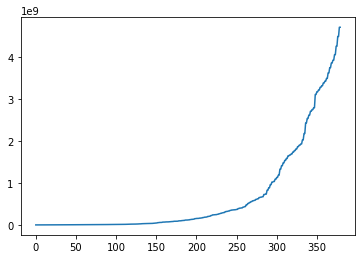

In [84]:
df.to_csv("info_dataFrame_공식환율.csv",index = False,encoding = "cp949")
import matplotlib.pyplot as plt
plt.plot(info_dataFrame["fiat_money"])

([<matplotlib.lines.Line2D at 0x1e2c539ee50>], 1.0466032988238472, 380)

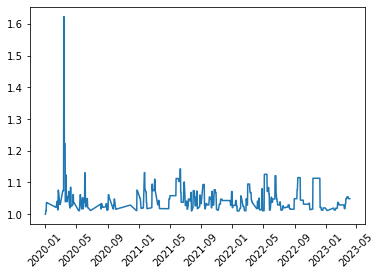

In [85]:
info_dataFrame.enter_time = pd.to_datetime(info_dataFrame.enter_time)
info_dataFrame.set_index("enter_time")
plt.xticks(rotation=45)
plt.plot(info_dataFrame.set_index("enter_time")["ror"]), info_dataFrame["ror"].mean(), len(info_dataFrame) #, sum( info_dataFrame["ror"]) / len(data)/30

In [52]:
import datetime
info_dataFrame['enter_time'] = pd.to_datetime(info_dataFrame['enter_time'], format='%Y-%m-%d', errors='raise')
df1 = info_dataFrame[["ror","enter_time","state","seed_krw"]]
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

target_date = '2020-02-10'

month_before = (datetime.strptime(target_date, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

# ====================================
ror = {"time":df1.iloc[0].enter_time,"ror":0,"거래횟수":0 }
ror_dataFrame = pd.DataFrame(ror, index=[0])
# start_time = df1.iloc[0].enter_time
print("바꿀 시작일",df1.iloc[0].enter_time)
start_time = "2020-01-01"
a = df1.iloc[len(df1["enter_time"])-1].enter_time
while True:
    
    end_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

    df_2 = df1.loc[df1["enter_time"].between((start_time),end_time)]
    
    try:
        ror["time"] = start_time
        ror["ror"] = df_2.iloc[len(df_2)-1].seed_krw/df_2.iloc[0].seed_krw
        ror["거래횟수"] = len(df_2)
        
        new_ror_dataFrame = pd.DataFrame(ror, index=[0])
        ror_dataFrame = pd.concat([ror_dataFrame, new_ror_dataFrame], axis=0)  # 수익 데이터 저장
        print(end_time,start_time)
    except:
        pass
    
    start_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')
    if datetime.strptime(start_time, '%Y-%m-%d') > a:
        break
ror_dataFrame = ror_dataFrame.reset_index(drop = True)
ror_dataFrame

바꿀 시작일 NaT
2020-02-01 2020-01-01
2020-03-01 2020-02-01
2020-04-01 2020-03-01
2020-05-01 2020-04-01
2020-06-01 2020-05-01
2020-07-01 2020-06-01
2020-09-01 2020-08-01
2020-10-01 2020-09-01
2020-11-01 2020-10-01
2020-12-01 2020-11-01
2021-01-01 2020-12-01
2021-02-01 2021-01-01
2021-03-01 2021-02-01
2021-04-01 2021-03-01
2021-05-01 2021-04-01
2021-06-01 2021-05-01
2021-07-01 2021-06-01
2021-08-01 2021-07-01
2021-09-01 2021-08-01
2021-10-01 2021-09-01
2021-11-01 2021-10-01
2021-12-01 2021-11-01
2022-01-01 2021-12-01
2022-02-01 2022-01-01
2022-03-01 2022-02-01
2022-04-01 2022-03-01
2022-05-01 2022-04-01
2022-06-01 2022-05-01
2022-07-01 2022-06-01
2022-08-01 2022-07-01
2022-09-01 2022-08-01
2022-10-01 2022-09-01
2022-11-01 2022-10-01
2022-12-01 2022-11-01
2023-01-01 2022-12-01
2023-02-01 2023-01-01
2023-03-01 2023-02-01
2023-04-01 2023-03-01
2023-05-01 2023-04-01


,time,ror,거래횟수
0,NaN,0.000000,0
1,2020-01-01,1.064598,5
2,2020-02-01,1.155832,10
3,2020-03-01,2.861077,17
4,2020-04-01,1.326270,16
5,2020-05-01,1.258872,13
6,2020-06-01,1.240135,12
7,2020-08-01,1.185875,17
8,2020-09-01,1.231081,12
9,2020-10-01,0.986666,2


In [96]:
import pandas as pd
data = pd.read_csv("data.csv",encoding = "utf-8")
# del data["Unnamed: 0"]


data["날짜_2"] = pd.to_datetime(data['날짜_2'], format='%Y-%m-%d %H:%M', errors='raise')

# 서버 점검일 or 비트코인 전송 불가일
up_sutdown = [("2018-04-16 20:00", "2018-04-17 00:00"),
            ("2018-04-24 07:59", "2018-04-24 08:30"),
            ("2018-06-15 04:00", "2018-06-15 05:00"),
            ("2018-08-22 02:00", "2018-08-22 07:00"),
            ("2018-10-18 02:00", "2018-10-18 03:00"),
            ("2018-12-05 03:00", "2018-12-05 04:00"),
            ("2018-12-12 03:00", "2018-12-12 04:00"),
            ("2019-01-01 01:00", "2019-01-01 03:00"),
            ("2019-03-20 02:00", "2019-03-20 06:00"),
            ("2019-03-24 03:00", "2019-03-24 04:00"),
            ("2020-01-31 02:00", "2020-01-31 05:00"),
            ("2021-01-07 05:00", "2021-01-07 06:00"),
            ("2021-03-03 03:30", "2021-03-03 06:30"),
            ("2021-03-14 03:00", "2021-03-14 06:00"),
            ("2021-03-23 03:00", "2021-03-23 06:00"),
            ("2021-06-30 23:00", "2021-07-01 03:00"),
            ("2019-10-17 21:00", "2019-10-18 13:00"),
            ("2019-04-10 21:50", "2019-04-17 02:00"),
            ("2019-12-12 23:55", "2019-12-13 03:00"),
            ("2019-12-15 00:00", "2019-12-15 01:00"),
            ("2020-12-29 01:30", "2020-12-29 02:25"),
            ("2020-12-30 19:01", "2021-01-01 05:02"),
            ("2021-06-29 21:01", "2021-07-01 04:51"),
            ("2021-08-17 02:00" , "2021-08-17 06:00") ,
            ("2021-08-26 03:00" , "2021-08-26 05:00") ,
            ("2021-09-30 05:50" , "2021-09-30 06:50") ,
            ("2021-10-05 23:30" , "2021-10-06 00:30") ,
            ("2021-10-12 23:00" , "2021-10-13 02:00") ,
            ("2021-10-19 23:00" , "2021-10-20 02:00") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2021-10-19 23:30" , "2021-10-20 00:30") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2022-01-01 07:00" , "2022-01-01 05:52") ,
            ("2022-02-14 04:46" , "2022-02-14 04:45") ,
            ("2022-05-11 02:00" , "2022-05-11 05:00") ,
            ("2022-05-24 02:00" , "2022-05-24 04:00") ,
            ("2022-10-01 04:25" , "2022-10-01 05:50") ,
            ("2022-10-15 23:50" , "2022-10-16 01:00") ,
            ("2022-12-31 20:00" , "2023-01-01 07:00") ,
            ("2023-02-22 02:00" , "2023-02-22 06:00") ,
            ("2023-03-31 23:00" , "2023-04-01 07:00") ,
            ("2023-04-01 05:54" , "2023-04-01 06:00") ,
            ("2023-04-03 17:55" , "2023-04-03 17:18") ,
            ("2001-01-02" , "2018-04-10") # trian 기간 제외
#             ("2022-07-19" , "2023-04-09") # LSTM데이터 셋과 타임테이블 맞춤
             ]
# 서버 점검일이 아닌 날짜만 받기
for i in range(len(up_sutdown)):
    data = data.loc[~(data["날짜_2"].between(up_sutdown[i][0],up_sutdown[i][1]))]

Measure_Usdt =  1

seed = 1000000
up_fee = 0.0005
bin_fee = 0.0001
send_fee = 0.0009

up_to_bin_pre = 0.01
bin_to_up_pre = 0.15


data["바이낸스달러환산"] = data["달러환율"] * data["바이낸스USDT(달러)"]
data["프리미엄가"] = (1- data["비트코인한국"] / data["바이낸스달러환산"])
data["재측정달러가치"] = ((Measure_Usdt / data['바이낸스USDT(달러)']) *data['비트코인한국']) / Measure_Usdt


info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed}
info_dataFrame = pd.DataFrame(info, index=[0])

data = data.reset_index(drop = True)

# 기간에 따른 수익율 재측정.
data = data.loc[(data["날짜"].between("2020-01-01","2024-01-01"))].reset_index(drop = True) # 위에서 정의됨
data

,날짜,비트코인한국,바이낸스USDT(달러),달러환율,날짜_2,LSTM예측값,바이낸스달러환산,프리미엄가,재측정달러가치,재측정달러가치_예상김프,달러환율_예상김프,LSTM예측값_예상김프
0,2020-01-01,8343000.0,7195.24,1155.07,2020-01-01 09:00:00,1149.394287,8.311006e+06,-0.003850,1159.516569,-0.023936,-0.024656,-0.025576
1,2020-01-02,8308000.0,7200.77,1155.02,2020-01-02 09:00:00,1148.802368,8.317033e+06,0.001086,1153.765500,-0.024868,-0.024664,-0.025672
2,2020-01-03,8300000.0,6965.49,1157.94,2020-01-03 09:00:00,1148.537598,8.065619e+06,-0.029059,1191.588819,-0.018739,-0.024191,-0.025715
3,2020-01-04,8038000.0,7345.00,1157.94,2020-01-04 09:00:00,1148.624756,8.505069e+06,0.054917,1094.349898,-0.034494,-0.024191,-0.025700
4,2020-01-05,8476000.0,7354.19,1157.94,2020-01-05 09:00:00,1148.914673,8.515711e+06,0.004663,1152.540253,-0.025066,-0.024191,-0.025653
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2023-04-02,37540000.0,28452.74,1296.97,2023-04-02 09:00:00,1314.534912,3.690235e+07,-0.017279,1319.380840,0.001966,-0.001665,0.001181
1186,2023-04-03,37596000.0,28171.87,1306.47,2023-04-03 09:00:00,1313.118896,3.680570e+07,-0.021472,1334.522699,0.004419,-0.000126,0.000951
1187,2023-04-04,37296000.0,27800.00,1308.76,2023-04-04 09:00:00,1311.787964,3.638353e+07,-0.025079,1341.582734,0.005563,0.000245,0.000735
1188,2023-04-05,36814000.0,28165.47,1310.54,2023-04-05 09:00:00,1310.544189,3.691198e+07,0.002654,1307.061448,-0.000030,0.000533,0.000534


In [107]:
def fun_cheak_ror(data,seed,info_dataFrame,info):
    a = 1

    for i in range(len(data)):
        seed1 = seed

#         if (info['state'] == False) and (data["프리미엄가"][i] > data["달러환율_예상김프"][i]): # 4709
        if ((data["LSTM예측값_예상김프"][i] - data["프리미엄가"][i])<0) and (info['state'] == False): # 4535
#         if (info['state'] == False) and (data["프리미엄가"][i] > data["재측정달러가치_예상김프"][i]): # 4932


#         현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우 => 내가 외국 거래소에서 환전 받을때 더 수익을 보는 경우.
#         if (float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False): # ror 565
        # 김프가 # 현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우
        # if (data["프리미엄가"][i] < up_to_bin_pre) and ((float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False)):

        # if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False):  # 프리미엄이 0보다 작고 포지션이 없다면
#         if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False) and (data["달러환율"][i] < data["재측정달러가치"][i]):  # 프리미엄이 0보다 작고 포지션이 없다면

#         if (info['state'] == False) and (data["달러환율"][i] > data["재측정달러가치"][i]):  # 환율보다 비공식 환율이 더 큰 경우

#         if (data["달러환율"][i] < data["LSTM예측값"][i]) and (info['state'] == False):
#         if (data["프리미엄가"][i] > data["LSTM예측값_예상김프"][i]) and (info['state'] == False) : # 역프일때 바로진입하지 않고 더 많은 수익을 볼 수 있군
        #         print("if문 통과 포지션 진입",data["프리미엄가"][i] , data["LSTM예측값_예상김프"][i])
            info["state"] = True  # 바이낸스로 차익봄
            info["enter_price"] = data['비트코인한국'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['바이낸스USDT(달러)'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed_usdt = float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee) - send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee))  # 달러로 가질돈

            info["seed_fiat"] = seed_usdt
            info["seed_krw"] = seed_usdt * data["달러환율"][i]
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장
            a = 0
        #         info["ror"] = None


        #     if (((data['프리미엄가'][i]) >= bin_to_up_pre) and (info['state'] == True)):  # 프리미엄이 0보다 크고 포지션이 없다면
        elif  (a != 1) and((float(seed * (1 + bin_to_up_pre)) < (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee)))))and (info['state'] == True):
    #         print("if문 통과 포지션 탈출",float(seed * (1 + bin_to_up_pre)) , (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))))
            info["state"] = False  # 업비트로 재전송
            info["enter_price"] = data['바이낸스USDT(달러)'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['비트코인한국'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed = info["fiat_money"] = float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))
        #         print(info["fiat_money"])
            info["ror"] = seed / seed1

            info["seed_fiat"] = seed
            info["seed_krw"] = seed
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장

    return info_dataFrame

In [108]:
# data = data.loc[~(abs(data["프리미엄가"])>0.1)].reset_index(drop = True)
a = 1
seed = 1000000
bin_to_up_pre = 0.01
info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed, "비공식환율" : 0}
info_dataFrame = pd.DataFrame(info, index=[0])
info_dataFrame_ror = fun_cheak_ror(data,seed,info_dataFrame,info)

info_dataFrame = info_dataFrame_ror.reset_index(drop = True)
print("ror : ",(info_dataFrame["fiat_money"][len(info_dataFrame)-1])/(info_dataFrame["fiat_money"][0]))
info_dataFrame

ror :  4535.668408271583


,state,enter_price,enter_time,exit_price,ror,fiat_money,비공식환율,LSTM_pred_exchange_rate,seed_fiat,seed_krw,바이낸스USDT,비트코인KRW,달러환율,김치프리미엄,선형회귀예상김프,LSTM달러_예측값_예상김프,비공식환율예상김프
0,False,0.00,None,0.00,1.000000,1.000000e+06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,8343000.00,2020-01-01,7195.24,1.000000,1.000000e+06,1159.516569,1149.394287,8.554359e+02,9.880883e+05,7195.24,8343000.0,1155.07,-0.003850,-0.024656,-0.025576,-0.023936
2,False,6965.49,2020-01-03,8300000.00,1.011250,1.011250e+06,1191.588819,1148.537598,1.011250e+06,1.011250e+06,6965.49,8300000.0,1157.94,-0.029059,-0.024191,-0.025715,-0.018739
3,True,8038000.00,2020-01-04,7345.00,1.011250,1.011250e+06,1094.349898,1148.624756,9.169004e+02,1.061716e+06,7345.00,8038000.0,1157.94,0.054917,-0.024191,-0.025700,-0.034494
4,False,7354.19,2020-01-05,8476000.00,1.036842,1.048506e+06,1152.540253,1148.914673,1.048506e+06,1.048506e+06,7354.19,8476000.0,1157.94,0.004663,-0.024191,-0.025653,-0.025066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,True,35760000.00,2023-03-20,27972.87,1.105358,4.120518e+09,1278.381518,1321.354248,3.221271e+06,4.216966e+09,27972.87,35760000.0,1309.10,0.023465,0.000300,0.002285,-0.004677
376,False,27717.01,2023-03-21,37228000.00,1.049385,4.324009e+09,1343.146321,1322.117310,4.324009e+09,4.324009e+09,27717.01,37228000.0,1303.87,-0.030123,-0.000547,0.002409,0.005816
377,True,36020000.00,2023-03-30,28348.60,1.049385,4.324009e+09,1270.609483,1318.615845,3.401031e+06,4.445590e+09,28348.60,36020000.0,1307.13,0.027939,-0.000019,0.001842,-0.005936
378,False,28028.53,2023-03-31,37402000.00,1.048950,4.535668e+09,1334.426029,1317.367920,4.535668e+09,4.535668e+09,28028.53,37402000.0,1296.97,-0.028880,-0.001665,0.001640,0.004403


In [109]:
df = info_dataFrame[['state', 'enter_price', 'enter_time', 'exit_price', 'ror', 'fiat_money','바이낸스USDT', '비트코인KRW', '달러환율', '김치프리미엄',"LSTM_pred_exchange_rate","LSTM달러_예측값_예상김프"]]
df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",
                     "김치프리미엄":"kimch premium",
                     "LSTM달러_예측값_예상김프":"pred premium(Lstm-liner-pre)",
                    },inplace = True)

C:\Users\Happy\AppData\Local\Temp\ipykernel_11268\311990299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",


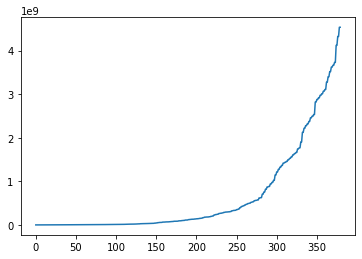

In [110]:
df.to_csv("info_dataFrame_LSTM예상.csv",index = False,encoding = "cp949")
import matplotlib.pyplot as plt
plt.plot(info_dataFrame["fiat_money"])

([<matplotlib.lines.Line2D at 0x1e2c49ab9a0>], 1.046418119192921, 380)

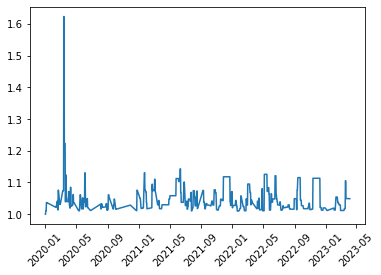

In [111]:
info_dataFrame.enter_time = pd.to_datetime(info_dataFrame.enter_time)
info_dataFrame.set_index("enter_time")
plt.xticks(rotation=45)
plt.plot(info_dataFrame.set_index("enter_time")["ror"]), info_dataFrame["ror"].mean(), len(info_dataFrame) #, sum( info_dataFrame["ror"]) / len(data)/30

In [112]:
import datetime
info_dataFrame['enter_time'] = pd.to_datetime(info_dataFrame['enter_time'], format='%Y-%m-%d', errors='raise')
df1 = info_dataFrame[["ror","enter_time","state","seed_krw"]]
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

target_date = '2020-02-10'

month_before = (datetime.strptime(target_date, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

# ====================================
ror = {"time":df1.iloc[0].enter_time,"ror":0,"거래횟수":0 }
ror_dataFrame = pd.DataFrame(ror, index=[0])
# start_time = df1.iloc[0].enter_time
print("바꿀 시작일",df1.iloc[0].enter_time)
start_time = "2020-01-01"
a = df1.iloc[len(df1["enter_time"])-1].enter_time
while True:
    
    end_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

    df_2 = df1.loc[df1["enter_time"].between((start_time),end_time)]
    
    try:
        ror["time"] = start_time
        ror["ror"] = df_2.iloc[len(df_2)-1].seed_krw/df_2.iloc[0].seed_krw
        ror["거래횟수"] = len(df_2)
        
        new_ror_dataFrame = pd.DataFrame(ror, index=[0])
        ror_dataFrame = pd.concat([ror_dataFrame, new_ror_dataFrame], axis=0)  # 수익 데이터 저장
        print(end_time,start_time)
    except:
        pass
    
    start_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')
    if datetime.strptime(start_time, '%Y-%m-%d') > a:
        break
ror_dataFrame = ror_dataFrame.reset_index(drop = True)
ror_dataFrame

바꿀 시작일 NaT
2020-02-01 2020-01-01
2020-03-01 2020-02-01
2020-04-01 2020-03-01
2020-05-01 2020-04-01
2020-06-01 2020-05-01
2020-07-01 2020-06-01
2020-09-01 2020-08-01
2020-10-01 2020-09-01
2020-11-01 2020-10-01
2020-12-01 2020-11-01
2021-01-01 2020-12-01
2021-02-01 2021-01-01
2021-03-01 2021-02-01
2021-04-01 2021-03-01
2021-05-01 2021-04-01
2021-06-01 2021-05-01
2021-07-01 2021-06-01
2021-08-01 2021-07-01
2021-09-01 2021-08-01
2021-10-01 2021-09-01
2021-11-01 2021-10-01
2021-12-01 2021-11-01
2022-01-01 2021-12-01
2022-02-01 2022-01-01
2022-03-01 2022-02-01
2022-04-01 2022-03-01
2022-05-01 2022-04-01
2022-06-01 2022-05-01
2022-07-01 2022-06-01
2022-08-01 2022-07-01
2022-09-01 2022-08-01
2022-10-01 2022-09-01
2022-11-01 2022-10-01
2022-12-01 2022-11-01
2023-01-01 2022-12-01
2023-02-01 2023-01-01
2023-03-01 2023-02-01
2023-04-01 2023-03-01
2023-05-01 2023-04-01


,time,ror,거래횟수
0,NaN,0.000000,0
1,2020-01-01,1.064598,5
2,2020-02-01,1.155832,10
3,2020-03-01,2.713091,15
4,2020-04-01,1.324395,16
5,2020-05-01,1.257381,13
6,2020-06-01,1.239061,12
7,2020-08-01,1.184381,17
8,2020-09-01,1.230249,12
9,2020-10-01,0.986612,2


In [87]:
import pandas as pd
data = pd.read_csv("data.csv",encoding = "utf-8")
# del data["Unnamed: 0"]


data["날짜_2"] = pd.to_datetime(data['날짜_2'], format='%Y-%m-%d %H:%M', errors='raise')

# 서버 점검일 or 비트코인 전송 불가일
up_sutdown = [("2018-04-16 20:00", "2018-04-17 00:00"),
            ("2018-04-24 07:59", "2018-04-24 08:30"),
            ("2018-06-15 04:00", "2018-06-15 05:00"),
            ("2018-08-22 02:00", "2018-08-22 07:00"),
            ("2018-10-18 02:00", "2018-10-18 03:00"),
            ("2018-12-05 03:00", "2018-12-05 04:00"),
            ("2018-12-12 03:00", "2018-12-12 04:00"),
            ("2019-01-01 01:00", "2019-01-01 03:00"),
            ("2019-03-20 02:00", "2019-03-20 06:00"),
            ("2019-03-24 03:00", "2019-03-24 04:00"),
            ("2020-01-31 02:00", "2020-01-31 05:00"),
            ("2021-01-07 05:00", "2021-01-07 06:00"),
            ("2021-03-03 03:30", "2021-03-03 06:30"),
            ("2021-03-14 03:00", "2021-03-14 06:00"),
            ("2021-03-23 03:00", "2021-03-23 06:00"),
            ("2021-06-30 23:00", "2021-07-01 03:00"),
            ("2019-10-17 21:00", "2019-10-18 13:00"),
            ("2019-04-10 21:50", "2019-04-17 02:00"),
            ("2019-12-12 23:55", "2019-12-13 03:00"),
            ("2019-12-15 00:00", "2019-12-15 01:00"),
            ("2020-12-29 01:30", "2020-12-29 02:25"),
            ("2020-12-30 19:01", "2021-01-01 05:02"),
            ("2021-06-29 21:01", "2021-07-01 04:51"),
            ("2021-08-17 02:00" , "2021-08-17 06:00") ,
            ("2021-08-26 03:00" , "2021-08-26 05:00") ,
            ("2021-09-30 05:50" , "2021-09-30 06:50") ,
            ("2021-10-05 23:30" , "2021-10-06 00:30") ,
            ("2021-10-12 23:00" , "2021-10-13 02:00") ,
            ("2021-10-19 23:00" , "2021-10-20 02:00") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2021-10-19 23:30" , "2021-10-20 00:30") ,
            ("2021-11-15 03:00" , "2021-11-15 06:00") ,
            ("2022-01-01 07:00" , "2022-01-01 05:52") ,
            ("2022-02-14 04:46" , "2022-02-14 04:45") ,
            ("2022-05-11 02:00" , "2022-05-11 05:00") ,
            ("2022-05-24 02:00" , "2022-05-24 04:00") ,
            ("2022-10-01 04:25" , "2022-10-01 05:50") ,
            ("2022-10-15 23:50" , "2022-10-16 01:00") ,
            ("2022-12-31 20:00" , "2023-01-01 07:00") ,
            ("2023-02-22 02:00" , "2023-02-22 06:00") ,
            ("2023-03-31 23:00" , "2023-04-01 07:00") ,
            ("2023-04-01 05:54" , "2023-04-01 06:00") ,
            ("2023-04-03 17:55" , "2023-04-03 17:18") ,
            ("2001-01-02" , "2018-04-10") # trian 기간 제외
#             ("2022-07-19" , "2023-04-09") # LSTM데이터 셋과 타임테이블 맞춤
             ]
# 서버 점검일이 아닌 날짜만 받기
for i in range(len(up_sutdown)):
    data = data.loc[~(data["날짜_2"].between(up_sutdown[i][0],up_sutdown[i][1]))]

Measure_Usdt =  1

seed = 1000000
up_fee = 0.0005
bin_fee = 0.0001
send_fee = 0.0009

up_to_bin_pre = 0.01
bin_to_up_pre = 0.15


data["바이낸스달러환산"] = data["달러환율"] * data["바이낸스USDT(달러)"]
data["프리미엄가"] = (1- data["비트코인한국"] / data["바이낸스달러환산"])
data["재측정달러가치"] = ((Measure_Usdt / data['바이낸스USDT(달러)']) *data['비트코인한국']) / Measure_Usdt


info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed}
info_dataFrame = pd.DataFrame(info, index=[0])

data = data.reset_index(drop = True)

# 기간에 따른 수익율 재측정.
data = data.loc[(data["날짜"].between("2020-01-01","2024-01-01"))].reset_index(drop = True) # 위에서 정의됨
data

,날짜,비트코인한국,바이낸스USDT(달러),달러환율,날짜_2,LSTM예측값,바이낸스달러환산,프리미엄가,재측정달러가치,재측정달러가치_예상김프,달러환율_예상김프,LSTM예측값_예상김프
0,2020-01-01,8343000.0,7195.24,1155.07,2020-01-01 09:00:00,1149.394287,8.311006e+06,-0.003850,1159.516569,-0.023936,-0.024656,-0.025576
1,2020-01-02,8308000.0,7200.77,1155.02,2020-01-02 09:00:00,1148.802368,8.317033e+06,0.001086,1153.765500,-0.024868,-0.024664,-0.025672
2,2020-01-03,8300000.0,6965.49,1157.94,2020-01-03 09:00:00,1148.537598,8.065619e+06,-0.029059,1191.588819,-0.018739,-0.024191,-0.025715
3,2020-01-04,8038000.0,7345.00,1157.94,2020-01-04 09:00:00,1148.624756,8.505069e+06,0.054917,1094.349898,-0.034494,-0.024191,-0.025700
4,2020-01-05,8476000.0,7354.19,1157.94,2020-01-05 09:00:00,1148.914673,8.515711e+06,0.004663,1152.540253,-0.025066,-0.024191,-0.025653
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2023-04-02,37540000.0,28452.74,1296.97,2023-04-02 09:00:00,1314.534912,3.690235e+07,-0.017279,1319.380840,0.001966,-0.001665,0.001181
1186,2023-04-03,37596000.0,28171.87,1306.47,2023-04-03 09:00:00,1313.118896,3.680570e+07,-0.021472,1334.522699,0.004419,-0.000126,0.000951
1187,2023-04-04,37296000.0,27800.00,1308.76,2023-04-04 09:00:00,1311.787964,3.638353e+07,-0.025079,1341.582734,0.005563,0.000245,0.000735
1188,2023-04-05,36814000.0,28165.47,1310.54,2023-04-05 09:00:00,1310.544189,3.691198e+07,0.002654,1307.061448,-0.000030,0.000533,0.000534


In [88]:
def fun_cheak_ror(data,seed,info_dataFrame,info):
    a = 1

    for i in range(len(data)):
        seed1 = seed

        if (info['state'] == False) and (data["프리미엄가"][i] > data["달러환율_예상김프"][i]): # 4709
#         if ((data["LSTM예측값_예상김프"][i] - data["프리미엄가"][i])<0) and (info['state'] == False): # 4535
#         if (info['state'] == False) and (data["프리미엄가"][i] > data["재측정달러가치_예상김프"][i]): # 4932


#         현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우 => 내가 외국 거래소에서 환전 받을때 더 수익을 보는 경우.
#         if (float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False): # ror 565
        # 김프가 # 현재 내 시드(원화/달러가치)가 전송 후 판매까지 완료한 달러가치보다 큰경우
        # if (data["프리미엄가"][i] < up_to_bin_pre) and ((float(seed / data['달러환율'][i]) <= (float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee)- send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee) ))) and (info['state'] == False)):

        # if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False):  # 프리미엄이 0보다 작고 포지션이 없다면
#         if ((data['프리미엄가'][i]) <= up_to_bin_pre) and (info['state'] == False) and (data["달러환율"][i] < data["재측정달러가치"][i]):  # 프리미엄이 0보다 작고 포지션이 없다면

#         if (info['state'] == False) and (data["달러환율"][i] > data["재측정달러가치"][i]):  # 환율보다 비공식 환율이 더 큰 경우

#         if (data["달러환율"][i] < data["LSTM예측값"][i]) and (info['state'] == False):
#         if (data["프리미엄가"][i] > data["LSTM예측값_예상김프"][i]) and (info['state'] == False) : # 역프일때 바로진입하지 않고 더 많은 수익을 볼 수 있군
        #         print("if문 통과 포지션 진입",data["프리미엄가"][i] , data["LSTM예측값_예상김프"][i])
            info["state"] = True  # 바이낸스로 차익봄
            info["enter_price"] = data['비트코인한국'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['바이낸스USDT(달러)'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed_usdt = float((info["fiat_money"] / data['비트코인한국'][i] * (1 - up_fee) - send_fee) * data['바이낸스USDT(달러)'][i] * (1 - bin_fee))  # 달러로 가질돈

            info["seed_fiat"] = seed_usdt
            info["seed_krw"] = seed_usdt * data["달러환율"][i]
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장
            a = 0
        #         info["ror"] = None


        #     if (((data['프리미엄가'][i]) >= bin_to_up_pre) and (info['state'] == True)):  # 프리미엄이 0보다 크고 포지션이 없다면
        elif  (a != 1) and((float(seed * (1 + bin_to_up_pre)) < (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee)))))and (info['state'] == True):
    #         print("if문 통과 포지션 탈출",float(seed * (1 + bin_to_up_pre)) , (float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))))
            info["state"] = False  # 업비트로 재전송
            info["enter_price"] = data['바이낸스USDT(달러)'][i]
            info["enter_time"] = data['날짜'][i]
            info["exit_price"] = data['비트코인한국'][i]
            
            info["비공식환율"] = data['재측정달러가치'][i]
            info["LSTM_pred_exchange_rate"] = data['LSTM예측값'][i]

            seed = info["fiat_money"] = float(((seed_usdt  / data['바이낸스USDT(달러)'][i]) * (1 - bin_fee) - send_fee) * data['비트코인한국'][i] * (1 - up_fee))
        #         print(info["fiat_money"])
            info["ror"] = seed / seed1

            info["seed_fiat"] = seed
            info["seed_krw"] = seed
            info["바이낸스USDT"] = data['바이낸스USDT(달러)'][i]
            info["비트코인KRW"] =  data['비트코인한국'][i]
            info["달러환율"] = data["달러환율"][i]
            info["김치프리미엄"] = data["프리미엄가"][i]
            
            info["선형회귀예상김프"] = data["달러환율_예상김프"][i] # = 단순선형회귀 달러에 대고 찍은 프리미엄
            info["LSTM달러_예측값_예상김프"] = data["LSTM예측값_예상김프"][i]
            info["비공식환율예상김프"] = data["재측정달러가치_예상김프"][i]
            
            new_info_dataFrame = pd.DataFrame(info, index=[0])
            info_dataFrame = pd.concat([info_dataFrame, new_info_dataFrame], axis=0)  # 수익 데이터 저장

    return info_dataFrame

In [89]:
# data = data.loc[~(abs(data["프리미엄가"])>0.1)].reset_index(drop = True)
a = 1
seed = 1000000
bin_to_up_pre = 0.01
info = {"state": False, "enter_price": 0, "enter_time": None, "exit_price": 0, "ror": 1, "fiat_money": seed, "비공식환율" : 0}
info_dataFrame = pd.DataFrame(info, index=[0])
info_dataFrame_ror = fun_cheak_ror(data,seed,info_dataFrame,info)

info_dataFrame = info_dataFrame_ror.reset_index(drop = True)
print("ror : ",(info_dataFrame["fiat_money"][len(info_dataFrame)-1])/(info_dataFrame["fiat_money"][0]))
info_dataFrame

ror :  4709.854503706371


,state,enter_price,enter_time,exit_price,ror,fiat_money,비공식환율,LSTM_pred_exchange_rate,seed_fiat,seed_krw,바이낸스USDT,비트코인KRW,달러환율,김치프리미엄,선형회귀예상김프,LSTM달러_예측값_예상김프,비공식환율예상김프
0,False,0.00,None,0.00,1.000000,1.000000e+06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,8343000.00,2020-01-01,7195.24,1.000000,1.000000e+06,1159.516569,1149.394287,8.554359e+02,9.880883e+05,7195.24,8343000.0,1155.07,-0.003850,-0.024656,-0.025576,-0.023936
2,False,6965.49,2020-01-03,8300000.00,1.011250,1.011250e+06,1191.588819,1148.537598,1.011250e+06,1.011250e+06,6965.49,8300000.0,1157.94,-0.029059,-0.024191,-0.025715,-0.018739
3,True,8038000.00,2020-01-04,7345.00,1.011250,1.011250e+06,1094.349898,1148.624756,9.169004e+02,1.061716e+06,7345.00,8038000.0,1157.94,0.054917,-0.024191,-0.025700,-0.034494
4,False,7354.19,2020-01-05,8476000.00,1.036842,1.048506e+06,1152.540253,1148.914673,1.048506e+06,1.048506e+06,7354.19,8476000.0,1157.94,0.004663,-0.024191,-0.025653,-0.025066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,True,36372000.00,2023-03-24,28295.42,1.049385,4.257045e+09,1285.437714,1323.105347,3.309735e+06,4.258537e+09,28295.42,36372000.0,1286.67,0.000958,-0.003334,0.002569,-0.003534
376,False,27454.46,2023-03-25,37268000.00,1.054737,4.490065e+09,1357.447934,1322.955200,4.490065e+09,4.490065e+09,27454.46,37268000.0,1286.67,-0.055009,-0.003334,0.002545,0.008133
377,True,36020000.00,2023-03-30,28348.60,1.054737,4.490065e+09,1270.609483,1318.615845,3.531642e+06,4.616316e+09,28348.60,36020000.0,1307.13,0.027939,-0.000019,0.001842,-0.005936
378,False,28028.53,2023-03-31,37402000.00,1.048950,4.709855e+09,1334.426029,1317.367920,4.709855e+09,4.709855e+09,28028.53,37402000.0,1296.97,-0.028880,-0.001665,0.001640,0.004403


In [90]:
df = info_dataFrame[['state', 'enter_price', 'enter_time', 'exit_price', 'ror', 'fiat_money','바이낸스USDT', '비트코인KRW', '달러환율',"비공식환율", '김치프리미엄','비공식환율예상김프']]
df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",
                     "비공식환율":"unofficial exchange rate",
                     "김치프리미엄":"kimch premium",
                     "비공식환율예상김프":"pred premium(un_official)",
                    },inplace = True)

C:\Users\Happy\AppData\Local\Temp\ipykernel_11268\1310666115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"바이낸스USDT":"bin btc price (usdt)","비트코인KRW":"up btc price (krw)","달러환율":"exchage rate(usd)","up btc price (krw)":"exchage rate(usd)",


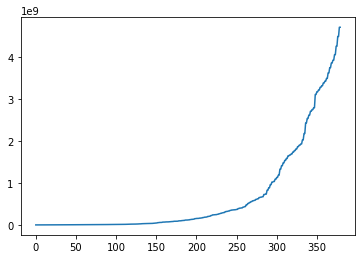

In [91]:
df.to_csv("info_dataFrame_비공식환율.csv",index = False,encoding = "cp949")
import matplotlib.pyplot as plt
plt.plot(info_dataFrame["fiat_money"])

([<matplotlib.lines.Line2D at 0x1e2c52aedf0>], 1.0466032988238472, 380)

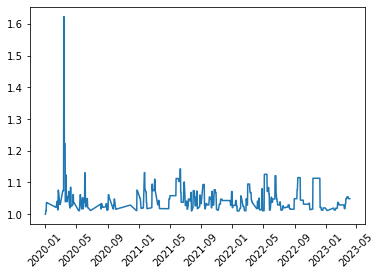

In [92]:
info_dataFrame.enter_time = pd.to_datetime(info_dataFrame.enter_time)
info_dataFrame.set_index("enter_time")
plt.xticks(rotation=45)
plt.plot(info_dataFrame.set_index("enter_time")["ror"]), info_dataFrame["ror"].mean(), len(info_dataFrame) #, sum( info_dataFrame["ror"]) / len(data)/30

In [93]:
import datetime
info_dataFrame['enter_time'] = pd.to_datetime(info_dataFrame['enter_time'], format='%Y-%m-%d', errors='raise')
df1 = info_dataFrame[["ror","enter_time","state","seed_krw"]]
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

target_date = '2020-02-10'

month_before = (datetime.strptime(target_date, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

# ====================================
ror = {"time":df1.iloc[0].enter_time,"ror":0,"거래횟수":0 }
ror_dataFrame = pd.DataFrame(ror, index=[0])
# start_time = df1.iloc[0].enter_time
print("바꿀 시작일",df1.iloc[0].enter_time)
start_time = "2020-01-01"
a = df1.iloc[len(df1["enter_time"])-1].enter_time
while True:
    
    end_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')

    df_2 = df1.loc[df1["enter_time"].between((start_time),end_time)]
    
    try:
        ror["time"] = start_time
        ror["ror"] = df_2.iloc[len(df_2)-1].seed_krw/df_2.iloc[0].seed_krw
        ror["거래횟수"] = len(df_2)
        
        new_ror_dataFrame = pd.DataFrame(ror, index=[0])
        ror_dataFrame = pd.concat([ror_dataFrame, new_ror_dataFrame], axis=0)  # 수익 데이터 저장
        print(end_time,start_time)
    except:
        pass
    
    start_time = (datetime.strptime(start_time, '%Y-%m-%d') + relativedelta(months = 1)).strftime('%Y-%m-%d')
    if datetime.strptime(start_time, '%Y-%m-%d') > a:
        break
ror_dataFrame = ror_dataFrame.reset_index(drop = True)
ror_dataFrame

바꿀 시작일 NaT
2020-02-01 2020-01-01
2020-03-01 2020-02-01
2020-04-01 2020-03-01
2020-05-01 2020-04-01
2020-06-01 2020-05-01
2020-07-01 2020-06-01
2020-09-01 2020-08-01
2020-10-01 2020-09-01
2020-11-01 2020-10-01
2020-12-01 2020-11-01
2021-01-01 2020-12-01
2021-02-01 2021-01-01
2021-03-01 2021-02-01
2021-04-01 2021-03-01
2021-05-01 2021-04-01
2021-06-01 2021-05-01
2021-07-01 2021-06-01
2021-08-01 2021-07-01
2021-09-01 2021-08-01
2021-10-01 2021-09-01
2021-11-01 2021-10-01
2021-12-01 2021-11-01
2022-01-01 2021-12-01
2022-02-01 2022-01-01
2022-03-01 2022-02-01
2022-04-01 2022-03-01
2022-05-01 2022-04-01
2022-06-01 2022-05-01
2022-07-01 2022-06-01
2022-08-01 2022-07-01
2022-09-01 2022-08-01
2022-10-01 2022-09-01
2022-11-01 2022-10-01
2022-12-01 2022-11-01
2023-01-01 2022-12-01
2023-02-01 2023-01-01
2023-03-01 2023-02-01
2023-04-01 2023-03-01
2023-05-01 2023-04-01


,time,ror,거래횟수
0,NaN,0.000000,0
1,2020-01-01,1.064598,5
2,2020-02-01,1.155832,10
3,2020-03-01,2.861077,17
4,2020-04-01,1.326270,16
5,2020-05-01,1.258872,13
6,2020-06-01,1.240135,12
7,2020-08-01,1.185875,17
8,2020-09-01,1.231081,12
9,2020-10-01,0.986666,2
